## Multi variate linear regression with batch gradient descent

***

#### Process:

1. Import libraries (numpy, pandas, matplotlib)
2. Read data into DataFrame object
3. Implement cost function $J(\theta)$ for gradient descent
4. Run gradient descent to fit parameters $\theta$
5. Use cost function $h(\theta) = \sum_{i=0}^{n-1}\theta_{i}x_{i}$ to predict _y_ values

***

In [9]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # for plotting 3-D graphs

In [219]:
# read text file into pandas DataFrame
df = pd.read_csv("ex1data2.txt", sep=",", header=None, names=["Area","Rooms","Price"])
df.head() # printing the data

,Area,Rooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


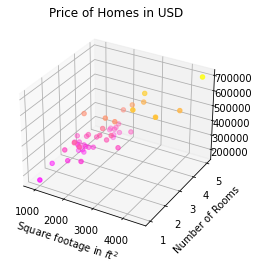

In [19]:
# plotting our data, 
# where our x-axis represents something and our y-axis represents something, 
# and our z-axis represents something

fig = plt.figure()
ax = plt.axes(projection="3d")

z_points = df["Price"]
x_points = df["Area"]
y_points = df["Rooms"]
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='spring');
ax.set_ylabel('Number of Rooms')
ax.set_xlabel('Square footage in ${ft}^2$')
ax.set_title('Price of Homes in USD')

plt.show()

***
Now, it's time to **initialize necessary vectors**. 

We need:
 * _X_ - a matrix whose columns are different features of our data
 * _y_ - column vector whose entries are the final outputs of our training data
 * $\theta$ - row vector whose entries are the different parameters to our hypothesis function 

In [210]:
# Create feature vector X
X = np.ones(shape=(df.shape[0],1)) # x_0 is just ones
X = pd.DataFrame(X[:,0])
X[1] = df['Area'] # x_1 is the area
X[2] = df['Rooms'] # x_2 is the number of rooms

# Create y vector
y = df['Price'] 

# create a vector of theta parameters, 
# where the number of parameters is the number of features
theta = np.zeros(shape=(1, df.shape[1])) 
theta = pd.DataFrame(theta)

# bookkeeping dimensions
print(f"Dimensions of X are: {X.shape}")
print(f"Dimensions of y are: {y.shape}")
print(f"Dimensions of theta are: {theta.shape}")

Dimensions of X are: (47, 3)
Dimensions of y are: (47,)
Dimensions of theta are: (1, 3)


Now, what we should do is implement **feature scaling** to get all of our features within the same magnitude of size. It's best practice to aim for every feature $x_{i}$ to be in the range: $-1\leq x_{i}\leq 1$. 

The most common way to do this is by implementing **mean normalization**: $x_{i} := \frac{x_{i}-\mu}{\sigma}$, where $\mu$ is the average value of $x_{i}$ in the training set and $\sigma$ is either the range or the standard deviation of the $x_{i}$'s in the training set.

In [211]:
# variables for the scaled DataFrames
X_mean = X.mean() # stores the mean of each feature x_i in its own row
X_std = X.std() # stores the standard deviation of each feature x_i in its own row


# stores the scaled x_i values in a new dataframe
X_scaled = pd.DataFrame(np.zeros(shape=(X.shape)))

# we would get a divide by zero error if we tried to divide x_0 values by their standard deviation
X_scaled[0] = pd.DataFrame(np.ones(shape=(X.shape[0],1))) 

for i in range(1,X.shape[1]):
    X_mean_df[i] = pd.DataFrame(np.ones(shape=(X.shape[0],1)) * X_mean[i])
    X_scaled[i] = (X[i] - X_mean[i]) / X_std[i]
    
X_scaled.head()

,0,1,2
0,1.0,0.130010,-0.223675
1,1.0,-0.504190,-0.223675
2,1.0,0.502476,-0.223675
3,1.0,-0.735723,-1.537767
4,1.0,1.257476,1.090417


***
It's almost time to run gradient descent! 

We just need to define our **cost function** $J(\theta)$ as follows:
$$ J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^{2} $$

where $m$ is the number of training examples, $h(\theta) = \sum_{i=0}^{n-1}\theta_{i}x_{i}$ is our hypothesis function ($n$ represents the number of features), and the superscript $(i)$ represents the value corresponding to the $i^{\textrm{th}}$ training example.


$J(\theta)$ should return a scalar value.

In [181]:
J = 0 # initializes our cost function J


# computes the summation part of J
for i in range(df.shape[0]):
    J += (((theta[0] * X_scaled.iat[i,0]) + (theta[1] * X_scaled.iat[i,1]) + (theta[2] * X_scaled.iat[i,2]) - y[i]) ** 2)

J = J / (2 * df.shape[0])

Now that we have our cost function all set up, the only thing we need to do now is **run gradient descent!**

***

Our gradient descent algorithm repeats the following assignment until convergence:
$$\theta_{j} := \theta_{j} - \frac{\partial}{\partial \theta_{j}}J(\theta)$$    (for $0\leq j \leq n$)

and after evaluating the partial derivatives, we get that our algorithm repeats the following *simultaneous* assignments until convergence:

$$\theta_{j} := \theta_{j} - \alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})\cdot x^{(i)}$$ (for $0\leq j \leq n$)

* We call this algorithm **batch gradient descent**, as it goes through *every* training example each iteration. 
* $\alpha$ is what we call the **learning rate**, and depending on how big or small it is, our algorithm will either converge faster, slower, or maybe even not at all!
* Notice that every $\theta_{j}$ is updated *simultaneously*; if they were instead updated procedurally, then for each iteration, $\theta_{j}$ and $\theta_{j+1}$, (where $0\leq j<j+1\leq n$) would be using different values for $h_{\theta}(x^{(i)})$, which is not what we want. 

(If we were to update each individual $\theta_{j}$ procedurally, our psuedo-gradient function would actually still work, but it wouldn't be considered gradient descent.)


In order to update our $\theta_{j}$ values simultaneously, we will employ the use of a *temporary variable* `temp_theta` to act as a placeholder for $\theta$ each iteration of gradient descent.

In [216]:
#### Implementing gradient descent ####
%matplotlib inline

# number of iterations
iter = 1000

# learning rate
alpha = 0.01

for i in range(iter):
    temp_theta = theta
    
    ### updating theta_1 ###
    for j in range(df.shape[1]):
        sum_j = 0 # the value of the summation for theta_j
        
        for k in range(df.shape[0]): # computes the sum through each training example
            sum_j += ((temp_theta[0] * X_scaled.iat[k,0]) + (temp_theta[1] * X_scaled.iat[k,1]) + (temp_theta[2] * X_scaled.iat[k,2]) - y[k]) * X_scaled.iloc[k]
        theta[j] = temp_theta[j] - ((alpha / df.shape[0]) * sum_j) 
    
    print(f"iter={i}: {float(theta[0])},{float(theta[1])},{float(theta[2])}")

iter=0: 50565.65520071281,50059.99864870568,50059.998648705674
iter=1: 53464.12524445036,52929.48399200586,52929.48399200585
iter=2: 56333.61058775054,55770.274481873035,55770.27448187303
iter=3: 59174.40107761772,58582.65706684154,58582.65706684153
iter=4: 61986.78366258622,61366.91582596036,61366.91582596035
iter=5: 64771.04242170504,64123.331997487985,64123.33199748798
iter=6: 67527.45859323267,66852.18400730034,66852.18400730033
iter=7: 70256.31060304503,69553.74749701457,69553.74749701456
iter=8: 72957.87409275926,72228.29535183166,72228.29535183165
iter=9: 75632.42194757635,74876.09772810058,74876.09772810056
iter=10: 78280.22432384526,77497.4220806068,77497.42208060679
iter=11: 80901.5486763515,80092.53318958796,80092.53318958795
iter=12: 83496.65978533265,82661.69318747932,82661.69318747931
iter=13: 86065.81978322401,85205.16158539176,85205.16158539175
iter=14: 88609.28818113645,87723.19529932507,87723.19529932506
iter=15: 91127.32189506976,90216.04867611906,90216.04867611904
i

iter=127: 259533.14610389253,256937.8146428536,256937.8146428536
iter=128: 260341.9412385983,257738.5218262123,257738.5218262123
iter=129: 261142.64842195698,258531.2219377374,258531.2219377374
iter=130: 261935.3485334821,259315.99504814725,259315.99504814725
iter=131: 262720.12164389197,260092.920427453,260092.920427453
iter=132: 263497.04702319775,260862.0765529657,260862.0765529657
iter=133: 264266.2031487105,261623.54111722327,261623.54111722327
iter=134: 265027.6677129681,262377.3910358383,262377.3910358383
iter=135: 265781.5176315831,263123.70245526714,263123.70245526714
iter=136: 266527.82905101194,263862.5507605017,263862.5507605017
iter=137: 267266.6773562465,264594.0105826839,264594.0105826839
iter=138: 267998.1371784287,265318.1558066443,265318.1558066443
iter=139: 268722.2824023891,266035.05957836506,266035.05957836506
iter=140: 269439.18617410987,266744.7943123687,266744.7943123687
iter=141: 270148.9209081135,267447.4316990322,267447.4316990322
iter=142: 270851.558294777,2

iter=254: 317843.8712118952,314665.4324997761,314665.4324997761
iter=255: 318069.55909552093,314888.8635045656,314888.8635045656
iter=256: 318292.9901003104,315110.06019930716,315110.06019930716
iter=257: 318514.18679505197,315329.04492710135,315329.04492710135
iter=258: 318733.17152284615,315545.8398076176,315545.8398076176
iter=259: 318949.9664033624,315760.46673932864,315760.46673932864
iter=260: 319164.59333507344,315972.9474017226,315972.9474017226
iter=261: 319377.0739974674,316183.3032574926,316183.3032574926
iter=262: 319587.4298532374,316391.5555547049,316391.5555547049
iter=263: 319795.6821504497,316597.7253289451,316597.7253289451
iter=264: 320001.8519246899,316801.8334054429,316801.8334054429
iter=265: 320205.9600011877,317003.90040117566,317003.90040117566
iter=266: 320408.02699692047,317203.94672695117,317203.94672695117
iter=267: 320608.073322696,317401.9925894689,317401.9925894689
iter=268: 320806.1191852137,317598.05799336144,317598.05799336144
iter=269: 321002.1845891

iter=387: 334483.5547926338,331138.7192447074,331138.7192447074
iter=388: 334542.8458404521,331197.4173820475,331197.4173820475
iter=389: 334601.54397779226,331255.5285380143,331255.5285380143
iter=390: 334659.655133759,331313.0585824214,331313.0585824214
iter=391: 334717.18517816614,331370.0133263844,331370.0133263844
iter=392: 334774.13992212916,331426.3985229078,331426.3985229078
iter=393: 334830.52511865256,331482.21986746596,331482.21986746596
iter=394: 334886.3464632107,331537.4829985785,331537.4829985785
iter=395: 334941.60959432326,331592.19349837996,331592.19349837996
iter=396: 334996.3200941247,331646.3568931834,331646.3568931834
iter=397: 335050.4834889281,331699.97865403874,331699.97865403874
iter=398: 335104.1052497835,331753.06419728557,331753.06419728557
iter=399: 335157.1907930303,331805.61888509995,331805.61888509995
iter=400: 335209.7454808447,331857.64802603616,331857.64802603616
iter=401: 335261.7746217809,331909.156875563,331909.156875563
iter=402: 335313.283471307

iter=514: 338758.1897927054,335370.6078947783,335370.6078947783
iter=515: 338774.73449052306,335386.9871456178,335386.9871456178
iter=516: 338791.1137413625,335403.2026039488,335403.2026039488
iter=517: 338807.3291996936,335419.25590769656,335419.25590769656
iter=518: 338823.3825034413,335435.14867840684,335435.14867840684
iter=519: 338839.2752741516,335450.88252141,335450.88252141
iter=520: 338855.00911715475,335466.4590259831,335466.4590259831
iter=521: 338870.58562172786,335481.8797655105,335481.8797655105
iter=522: 338886.00636125525,335497.1462976426,335497.1462976426
iter=523: 338901.27289338736,335512.2601644534,335512.2601644534
iter=524: 338916.38676019816,335527.2228925961,335527.2228925961
iter=525: 338931.34948834084,335542.03599345736,335542.03599345736
iter=526: 338946.1625892021,335556.70096331,335556.70096331
iter=527: 338960.8275590548,335571.21928346413,335571.21928346413
iter=528: 338975.3458792089,335585.5924204167,335585.5924204167
iter=529: 338989.71901616146,3355

iter=644: 339964.70483382174,336565.0577854835,336565.0577854835
iter=645: 339969.18438122823,336569.4925374159,336569.4925374159
iter=646: 339973.6191331606,336573.8829418289,336573.8829418289
iter=647: 339978.0095375737,336578.2294421979,336578.2294421979
iter=648: 339982.35603794263,336582.53247756313,336582.53247756313
iter=649: 339986.6590733079,336586.7924825747,336586.7924825747
iter=650: 339990.91907831945,336591.0098875362,336591.0098875362
iter=651: 339995.1364832809,336595.18511844805,336595.18511844805
iter=652: 339999.3117141928,336599.3185970508,336599.3185970508
iter=653: 340003.44519279554,336603.4107408675,336603.4107408675
iter=654: 340007.53733661224,336607.46196324605,336607.46196324605
iter=655: 340011.5885589908,336611.4726734008,336611.4726734008
iter=656: 340015.5992691456,336615.44327645405,336615.44327645405
iter=657: 340019.5698721988,336619.37417347677,336619.37417347677
iter=658: 340023.5007692215,336623.2657615292,336623.2657615292
iter=659: 340027.3923572

iter=771: 340287.66134804644,336884.78473456594,336884.78473456594
iter=772: 340288.9113303107,336886.0222170075,336886.0222170075
iter=773: 340290.1488127523,336887.2473246247,336887.2473246247
iter=774: 340291.3739203694,336888.46018116566,336888.46018116566
iter=775: 340292.5867769104,336889.66090914124,336889.66090914124
iter=776: 340293.787504886,336890.8496298371,336890.8496298371
iter=777: 340294.97622558184,336892.02646332595,336892.02646332595
iter=778: 340296.1530590707,336893.1915284799,336893.1915284799
iter=779: 340297.31812422466,336894.34494298237,336894.34494298237
iter=780: 340298.4715387271,336895.4868233398,336895.4868233398
iter=781: 340299.6134190845,336896.6172848936,336896.6172848936
iter=782: 340300.7438806383,336897.73644183186,336897.73644183186
iter=783: 340301.8630375766,336898.84440720076,336898.84440720076
iter=784: 340302.9710029455,336899.94129291596,336899.94129291596
iter=785: 340304.0678886607,336901.027209774,336901.027209774
iter=786: 340305.1538055

iter=897: 340377.42748742754,336973.6532125532,336973.6532125532
iter=898: 340377.7798082979,336974.0020102149,336974.0020102149
iter=899: 340378.12860595965,336974.3473199,336974.3473199
iter=900: 340378.47391564475,336974.68917648826,336974.68917648826
iter=901: 340378.815772233,336975.0276145106,336975.0276145106
iter=902: 340379.15421025536,336975.3626681527,336975.3626681527
iter=903: 340379.48926389747,336975.69437125843,336975.69437125843
iter=904: 340379.8209670032,336976.02275733306,336976.02275733306
iter=905: 340380.1493530778,336976.34785954695,336976.34785954695
iter=906: 340380.4744552917,336976.6697107387,336976.6697107387
iter=907: 340380.79630648345,336976.9883434185,336976.9883434185
iter=908: 340381.11493916326,336977.30378977157,336977.30378977157
iter=909: 340381.4303855163,336977.6160816611,336977.6160816611
iter=910: 340381.7426774058,336977.9252506317,336977.9252506317
iter=911: 340382.05184637645,336978.2313279126,336978.2313279126
iter=912: 340382.35792365734,

***
Now that we've fit our parameter vector $\theta$, let's use it in our hypothesis function $h_{\theta}$ to make predictions of cost based on house size and number of bedrooms!

*(Remember that our values that we are working with are scaled, so we will have to scale our inputs before plugging them into our hypothesis function.)*

For example, we will predict the price of a 3 bedroom house with an area of 2000 $\text{ft}^2$ using our hypothesis function $h_{\theta}$:

In [226]:
inputs = [1,2000,3]
area = inputs[1]
rooms = inputs[2]

predicted_price = theta.iat[0,0] * inputs[0]
for i in range(1,len(inputs)):
    inputs[i] = (inputs[i] - X_mean.iat[i]) / X_std[i]
    predicted_price += theta[i] * inputs[i]
print(f"Predicted price for {rooms} room, {area} sq ft house is ${int(predicted_price)}")

Predicted price for 3 room, 2000 sq ft house is $264733


Finally, replotting our original training data, but now with our predicted value plotted in orange, we get:

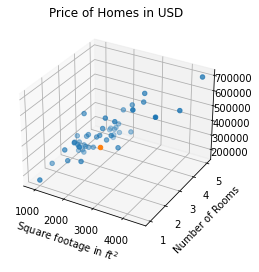

In [248]:
fig = plt.figure()
ax = plt.axes(projection="3d")

# scatter plot
z_points = df["Price"]
x_points = df["Area"]
y_points = df["Rooms"]
ax.scatter3D(x_points, y_points, z_points, c=None, cmap='spring');
ax.scatter3D(area, rooms, predicted_price)
ax.set_ylabel('Number of Rooms')
ax.set_xlabel('Square footage in ${ft}^2$')
ax.set_title('Price of Homes in USD')

plt.show()

***
## Voila!
    
We've successfully implemented multivariate linear regression! We can scale our model to input more features if we really want, though it would be impossible to graph past the (small number of) 2 features that we have here. 

Moreover, if we have a sufficiently large number of features, say, $n > 10000$, we can use something called **normal equations** in leiu of gradient descent to calculate $\theta$. For reference, the normal equation implementation involves the following computation: $\theta = (X^{T}X)^{-1}X^{T}\vec{y}$. Try to implement it and see what happens!